#### Final Project
* Student Name: JAMES WACHIRA MUTHEE/GROUP 1
* Mode of Study: PART TIME
* Project: End of Phase Project
* Technical Mentor: Samuel Karu

#### Business Understanding
Our company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have been tasked with the responsibility of exploring what types of films are currently doing the best at the box office and then translate those findings into actionable insights that the head of our company's new movie studio can use to help decide what type of films to create

#### Problem Statement 
Our company recognizes the growing trend among major industry players in producing original video content and intends to establish a new movie studio to capitalize on this opportunity. However, we currently lack the necessary expertise and insights into filmmaking. To effectively guide the studio's development, I have been assigned the task of investigating the types of films that are currently excelling at the box office. The challenge lies in not only identifying these successful film trends but also converting this information into practical recommendations that the studio's leadership can use to make informed decisions about future film productions. Failure to do so may result in misguided investments and an inability to compete in the market.

To guide my research and analysis, I have formulated some questions that will be key in giving us insights and recomendations on the problem at hand. These questions are:
* What are the trends in movie release dates and what impact do they have on revenue?
* Is there a relationship between production budget and profitability and ROI of a movie? i.e Does a higher production budget automatically result to a higher profitability and vice versa.....
* Is the average runtime of highly rated movies (e.g. ratings above 8) significantly different from that of lower-rated movies (e.g., ratings below 5)?

These are just but some of the questions we shall use to do our analysis and generate insights

#### Data
The Datasets for our analysis have been provided from the below sites:
1. https://www.boxofficemojo.com/: Provides box office data including historical performance, daily, weekend and yearly box office grosses, film comparisons, release schedules as well as production budgets
2. https://www.imdb.com/: Provides data on movie ratings, reviews, cast, box office gross
3. https://www.rottentomatoes.com/: Provides data on audience scores and audience reception
4. https://www.the-numbers.com/: Provides financial data on films including budgets, revenues and ratings
5. https://www.themoviedb.org/: Provides a wide range of information related to movies, TV shows, and celebrities.

#### Data Preparation and Cleaning
To analyze the data and generate insights, the following steps will be taken:

* Load the relevant libraries to use for the data analysis and visualization
* Load the Movie datasets which is in csv, tsv and db form to Jupyter Notebook
* Understand the data
* Identify and fix the missing values
* Ensure the columns have the correct data type
* Create new features that will be important for our analysis
* Merge important Data Frames


#### Importing the libraries

In [634]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
from scipy.stats import pearsonr, ttest_ind
sns.set_style()


#### Loading the Cleaned Dataset

In [635]:
merged_df = pd.read_csv("merged_df_cleaned", parse_dates = ["theater_date", "dvd_date", "release_date"])

#### 1. What are the trends in movie release dates and what impact do they have on revenue?

In [636]:
#Extract month from the release date column
merged_df["month"] = merged_df["release_date"].dt.month

#Extract year from the release date column
merged_df["year"] = merged_df["release_date"].dt.year


# Group by month and calculate the domestic and worldwide gross
monthly_gross_avg = merged_df.groupby('month').agg({'domestic_gross': ['mean', 'count'],
'worldwide_gross': 'mean'}).round(2)

# Renaming column names
monthly_gross_avg.columns = ['avg_domestic', 'movie_count', 'avg_worldwide']

monthly_gross_avg = monthly_gross_avg.reset_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


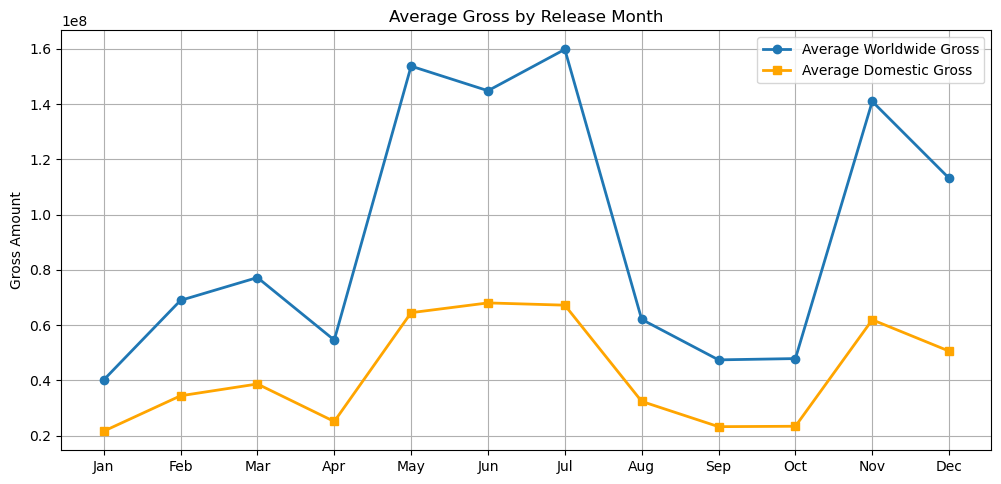

In [637]:
# Create visualization
plt.figure(figsize=(12, 12))

#Plot of Average Worldwide Gross by Month
x = months
y1 = monthly_gross_avg['avg_worldwide']
y2 = monthly_gross_avg['avg_domestic']

plt.subplot(2, 1, 1)
plt.plot(x, y1, marker='o', linewidth=2, label='Average Worldwide Gross')
plt.plot(x, y2, marker='s', linewidth=2, label='Average Domestic Gross', color='orange')
plt.title('Average Gross by Release Month')
plt.ylabel('Gross Amount')
plt.grid(True)
plt.legend()
plt.show()


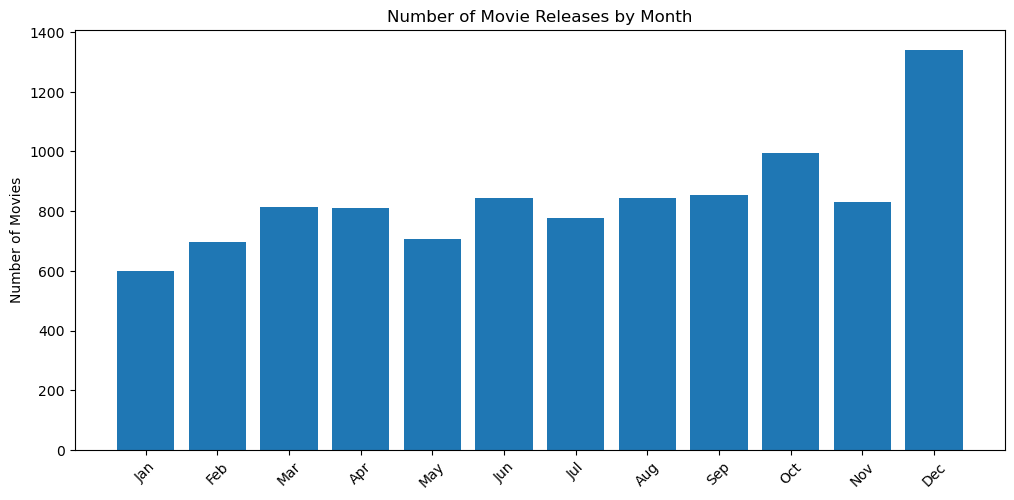

In [638]:
#Plot of Number of Movies Released by Month
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)
plt.bar(x, monthly_gross_avg['movie_count'])
plt.title('Number of Movie Releases by Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [639]:
#Print monthly statistics
print("Monthly Revenue Analysis:")

print(monthly_gross_avg)

Monthly Revenue Analysis:
    month  avg_domestic  movie_count  avg_worldwide
0       1   21641995.71          600   4.018672e+07
1       2   34455948.28          695   6.897808e+07
2       3   38723667.56          814   7.724391e+07
3       4   25148901.95          809   5.461725e+07
4       5   64532859.74          706   1.537543e+08
5       6   68064587.33          843   1.448574e+08
6       7   67248599.89          777   1.598247e+08
7       8   32424391.67          845   6.209446e+07
8       9   23278486.38          854   4.745250e+07
9      10   23424807.58          996   4.792050e+07
10     11   61960332.70          832   1.409789e+08
11     12   50618389.29         1340   1.131693e+08


In [640]:
#Calculate yearly trends
yearly_gross = merged_df.groupby('year').agg({
    'worldwide_gross': ['mean', 'count']
}).round(2)

#Rename the columns
yearly_gross.columns = ['avg_worldwide', 'movie_count']

yearly_gross = yearly_gross.reset_index()

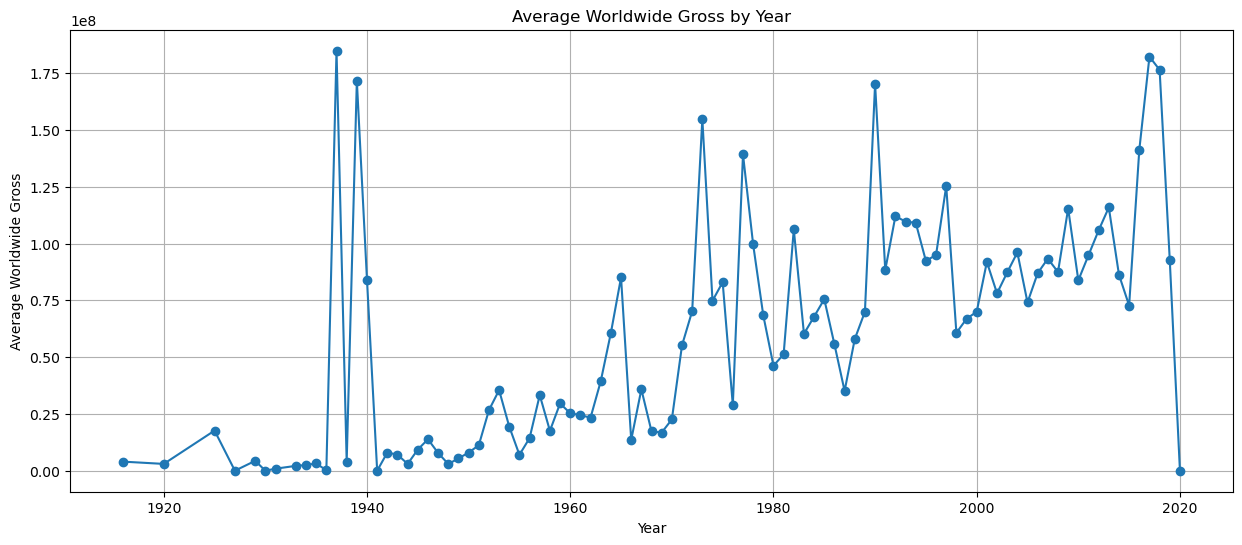

In [641]:
# Plot yearly trend
plt.figure(figsize=(15, 6))
plt.plot(yearly_gross['year'], yearly_gross['avg_worldwide'], marker='o')
plt.title('Average Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Gross')
plt.grid(True)
plt.show()

#### Findings

* According to the visualization, the domestic gross is lower than the worldwide gross. The trend of the domestic and worldwide gross is the same.
  
* Months between (May-July) consistently show the highest average worldwide and domestic gross
  
* July is the most profitable month with an average worldwide gross of 159.8M USD and domestic gross of 6.8M USD
  
* May and June follow closely with 153.7M USD and 144.9M USD respectively
  
* October has the highest number of movies released (996 movies) despite having lower average revenues compared to other months 
  
* The winter holiday season (November-December) also shows strong performance
  
* January and September show the lowest average revenues
  
The findings suggests that biggest budget films are released during the months between (May-July). This may be due to the activities during that period like summer vacations, holiday leisure time etc


### Recommendations


Based on the findings regarding movie release patterns and their impact on worldwide gross revenues, here are some recommendations I am making to our company:


1. High-Budget Releases in (May-July) period: I am recomending to the company to prioritize releasing high-budget films during the months of (May-July) because during this time people are more likely to engage in cinema outings. July is the most profitable month and therefore aiming at the May-July timeframe could maximize on box office revenue.
   
2. Focused Marketing: I would also recommend to the company to increase marketing efforts leading up to and during these months to maximize opening-weekend success and overall revenue. 

3. Release High-Potential Films in November-December: This is the holiday season and it shows strong performance in average revenue. I would recommend to the company to release family-oriented films and holiday-themed movies to take advantage of the holiday crowds.

4. Low-Cost, High-Return Genres: Finally I am recommending to the company to utilize lower budget or experimental films in months like January and September which have lower average revenue to maintain a consistent presence.



#### 2. Relationship between production budget, profitability and ROI
1.  Is there a relationship between production budget and profitability? 
2.  Is there a significant difference in ROI between movies that have a high production budget and those that have a low production budget?

### State the Null and Alternative Hypothesis
1. Null Hypothesis: There is no difference in ROI between movies that have a high production budget and those that have a low production budget
2. Alternative Hypothesis: There is a significant difference in ROI between movies that have a high production budget and those that have a low production budget

In [642]:
# Load the data
df = pd.read_csv('merged_df_cleaned')

# Display the first 3 rows of the dataframe to understand its structure
df.head(3)


,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2009-05-29,Up,175000000.0,293004164.0,7.314634e+08
2,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104.0,Action and Adventure,2014-03-07,Mr. Peabody & Sherman,145000000.0,111506430.0,2.698064e+08


In [643]:
# Check the missing values
df.isnull().sum()

id                   0
synopsis             0
rating               0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
genre                0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataset is cleaned and has no missing values

In [644]:
# Create new columns profitability and ROI and calculate
df['profitability'] = df['worldwide_gross'] - df['production_budget']

df['ROI'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']



corr_profit: 0.603508342791181
corr_roi: -0.04426861908236428


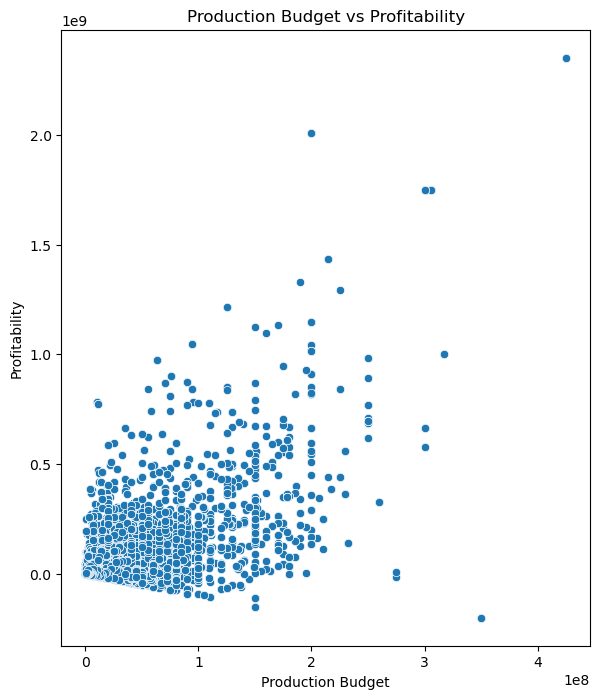

In [645]:
# Calculate correlations
corr_profit = df['production_budget'].corr(df['profitability'])

corr_roi =    df['production_budget'].corr(df['ROI'])

print(f"corr_profit: {corr_profit}")
print(f"corr_roi: {corr_roi}")

# Scatter plot for Production Budget vs Profitability
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='production_budget', y='profitability')
plt.title('Production Budget vs Profitability')
plt.xlabel('Production Budget')
plt.ylabel('Profitability')
plt.show()



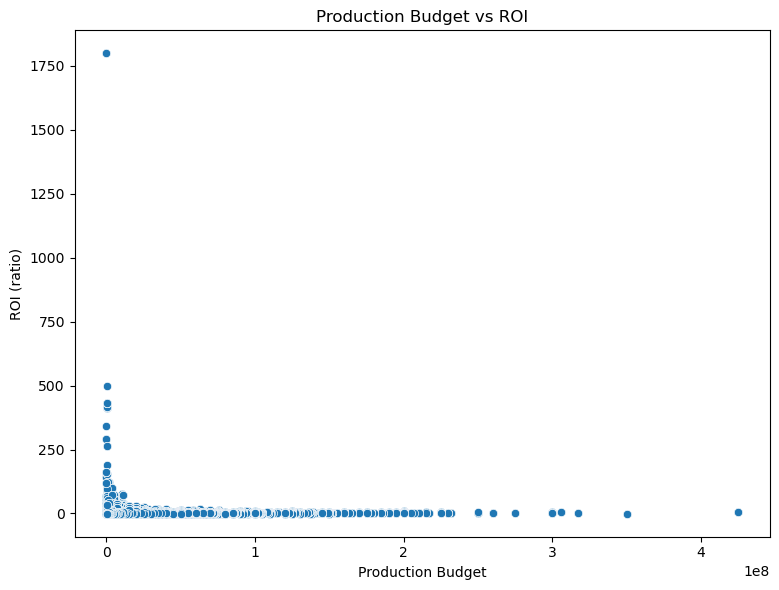

In [646]:
# Scatter plot for Production Budget vs ROI
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='production_budget', y='ROI')
plt.title('Production Budget vs ROI')
plt.xlabel('Production Budget')
plt.ylabel('ROI (ratio)')
plt.tight_layout()
plt.show()



In [647]:
# Print correlation results
print(f"Correlation Analysis:")
print("Production Budget vs Profitability:")
print(f"Correlation coefficient: {corr_profit:.4f}")


Correlation Analysis:
Production Budget vs Profitability:
Correlation coefficient: 0.6035


In [648]:
print("\
Production Budget vs ROI:")
print(f"Correlation coefficient: {corr_roi:.4f}")


Production Budget vs ROI:
Correlation coefficient: -0.0443


In [649]:
# Compare high vs low budget movies
median_budget = df['production_budget'].median()
high_budget = df[df['production_budget'] > median_budget]['ROI']
low_budget = df[df['production_budget'] <= median_budget]['ROI']

t_stat, p_val = ttest_ind(high_budget, low_budget)

print(f"T-test Results (High vs Low Budget Movies ROI):")

print(f"T-statistic: {t_stat:.4f}")

print(f"P-value: {p_val:.4f}")


T-test Results (High vs Low Budget Movies ROI):
T-statistic: -6.5431
P-value: 0.0000


In [650]:
# Calculate summary statistics
print(f"Summary Statistics:")
print(f"High Budget Movies (Above Median):")
print(f"Average ROI: {high_budget.mean():.4f}")
print(f"Median ROI: {high_budget.median():.4f}")


Summary Statistics:
High Budget Movies (Above Median):
Average ROI: 1.7413
Median ROI: 0.9293


In [651]:
print(f"Low Budget Movies (Below Median):")
print(f"Average ROI: {low_budget.mean():.4f}")
print(f"Median ROI: {low_budget.median():.4f}")

Low Budget Movies (Below Median):
Average ROI: 5.7386
Median ROI: 0.2663


Findings

The analysis shows a moderate positive correlation between production budget and profitability, but a very weak negative correlation between production budget and ROI.
Assuming a confidence level of 95%, our significance level is therefore 0.05. The p-value obtained from the t-test is far much less than the alpha value of 0.05 hence we reject the null hypothesis. This therefore indicates that there is a significant difference in ROI between high and low budget movies, with low budget movies having a higher average ROI. 

3 Recomendations to the company based on the above findings

#### 1. Low-Budget Film Investment.

The notable difference in ROI between high-budget and low-budget movies, where lower-budget films show a higher average ROI, indicates that investing in such films can be more profitable. Therefore, we recommend the company diversify its film portfolio by including more investments in lower-budget projects to enhance overall profitability and mitigate financial risk. Allocating a portion of funds to smaller, strategically selected productions that offer high returns relative to their cost will support this goal.

#### 2. Optimized Budget Resource Allocation

There is a weak negative correlation between production budget and ROI, suggesting that increasing the budget does not necessarily lead to higher returns. Higher spending on production may not result in proportional profitability gains. Therefore, we recommend the company implement stricter budget controls and optimize resource allocation to focus spending on elements that enhance the film's appeal without unnecessarily inflating costs.

#### 3. Marketing Focus
Low-budget films, though smaller in scale, can achieve high ROIs when marketed effectively to their target audience. The notable ROI of low-budget movies underscores the opportunity to maximize profitability through strategic marketing. I recommend the company develop tailored marketing campaigns for lower-budget films, utilizing cost-effective promotional strategies to enhance revenue potential.

 #### 3. Is the average runtime of highly rated movies (e.g. ratings above 8) significantly different from that of lower-rated movies (e.g., ratings below 5)?

#### State the Null and Alternative Hypothesis
1. Null Hypothesis: There is no difference between the runtime of highly rated movies and lower rated movies i.e ratings above 8
2. Alternative Hypothesis: There is a significant difference between the runtime of highly rated movies and lower rated movies i.e ratings below 5

In [652]:
#create a connection to the database
conn = sqlite3.connect("im.db")

#create a cursor
cur = conn.cursor()

#Check the table names for our database
pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [653]:
#Extract the column names for the movie_basics table
cur.execute("SELECT * FROM movie_basics")

columns = [description[0] for description in cur.description]

# Print column names
print("Column names:", columns)

# Fetch all the columns
data = cur.fetchall()

Column names: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']


In [654]:
#Extract the column names for the movie_ratings table
cur.execute("SELECT * FROM movie_ratings")

cols = [description[0] for description in cur.description]

# Print column names
print("Column names:", cols)

# Fetch all the columns
data1 = cur.fetchall()

Column names: ['movie_id', 'averagerating', 'numvotes']


##### Join the Movie_basics table and the Movie_ratings table using primary key movie id

In [655]:
query = ("""SELECT *
         FROM movie_basics AS MB
         JOIN movie_ratings AS MR
         ON MB.movie_id = MR.movie_id
         """)
#Convert to a Dataframe
movie_df = pd.read_sql(query, conn)
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


##### Check Missing Values for the joined tables

In [656]:
#check for the shape of the data
movie_df.shape

(73856, 9)

In [657]:
#check for data the statistics of numerical columns
movie_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [658]:
#check for missing values
movie_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In [659]:
# Get missing values count and percentage
missing_count = movie_df.isnull().sum()

missing_pct = (movie_df.isnull().sum() / len(movie_df)) * 100

# Create a summary dataframe

missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage Missing': missing_pct})

# Sort by percentage missing
missing_summary_df2 = missing_data.sort_values('Percentage Missing', ascending=False);

missing_summary_df2

,Missing Values,Percentage Missing
runtime_minutes,7620,10.317374
genres,804,1.088605
movie_id,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
movie_id,0,0.000000
averagerating,0,0.000000
numvotes,0,0.000000


 Only runtime column and genres have missing values which are small compared to the length of the dataset. The rows with the missing data fro runtime minutes and genres shall be removed so as to have a clean dataset

In [660]:
# Identify rows to remove
rows_to_remove = ["runtime_minutes", "genres"]

# Remove rows with NaN values in specified columns
movie_df.dropna(subset=rows_to_remove, inplace=True)

# Check for remaining NaN counts in the DataFrame
print(movie_df.isna().sum())

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64


In [661]:
#check for the dataset columns
movie_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes'],
      dtype='object')

Movie_id column is duplicated. Need to remove it

In [662]:
# Remove columns with duplicate names
movie_df = movie_df.loc[:, ~movie_df.columns.duplicated()]
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [663]:
#check for the data types
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [664]:
# Load the Cleaned and Joined Movie_basics and Movie_ratings csv
#movie_basics = pd.read_csv("movie_db_csv")

#check the 1st few rows
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [665]:
# Examine the structure of our data
print("Original DataFrame info:")
print(movie_df.info())

Original DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None


In [666]:
#Check the genres column
print(f"Sample of genres:")
print(movie_df['genres'].head(10))

Sample of genres:
0             Action,Crime,Drama
1                Biography,Drama
2                          Drama
4           Comedy,Drama,Fantasy
6     Adventure,Animation,Comedy
7                          Drama
8                        History
9                    Documentary
10                         Drama
11                   Documentary
Name: genres, dtype: object


In [667]:
#Create a copy of the dataframe
expanded_df = movie_df.copy()

# Convert the genres string to a list
expanded_df['genre'] = expanded_df['genres'].str.split(',')

#Create a row for each genre
expanded_df = expanded_df.explode('genre')

# Show the results
print(f"Rows: {expanded_df.shape[0]}, Columns: {expanded_df.shape[1]}")



Rows: 118437, Columns: 9


In [668]:
#print first few rows of new df
expanded_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama


In [669]:
#print the columns of new df
expanded_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'genre'],
      dtype='object')

In [670]:
# Drop the original 'genres' column since we now have individual genres
expanded_df = expanded_df.drop('genres', axis=1)

In [671]:
expanded_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Drama


In [672]:
expanded_df.shape

(118437, 8)

In [673]:

# Group by movie_id to calculate average runtime and rating for each movie
movie_stats = expanded_df.groupby('movie_id').agg({
    'runtime_minutes': 'mean',
    'averagerating': 'mean'}).reset_index()

# Create high and low rated movie groups
high_rated = movie_stats[movie_stats['averagerating'] >= 8]

low_rated = movie_stats[movie_stats['averagerating'] < 5]



In [674]:
# Calculate basic statistics
high_rated_stats = high_rated['runtime_minutes'].describe()

low_rated_stats = low_rated['runtime_minutes'].describe()

print("High-Rated Movies (Rating >= 8) Runtime Statistics:")
print(high_rated_stats)


High-Rated Movies (Rating >= 8) Runtime Statistics:
count    7988.000000
mean       88.620431
std        39.037479
min         4.000000
25%        70.000000
50%        86.000000
75%       100.000000
max      1440.000000
Name: runtime_minutes, dtype: float64


In [675]:
print("\
Low-Rated Movies (Rating < 5) Runtime Statistics:")
print(low_rated_stats)

Low-Rated Movies (Rating < 5) Runtime Statistics:
count    10991.000000
mean        92.710490
std         19.802852
min          4.000000
25%         82.000000
50%         90.000000
75%         99.000000
max        480.000000
Name: runtime_minutes, dtype: float64


In [676]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(high_rated['runtime_minutes'], low_rated['runtime_minutes'])

print("\
t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")



t-test Results:
t-statistic: -9.4395
p-value: 0.0000


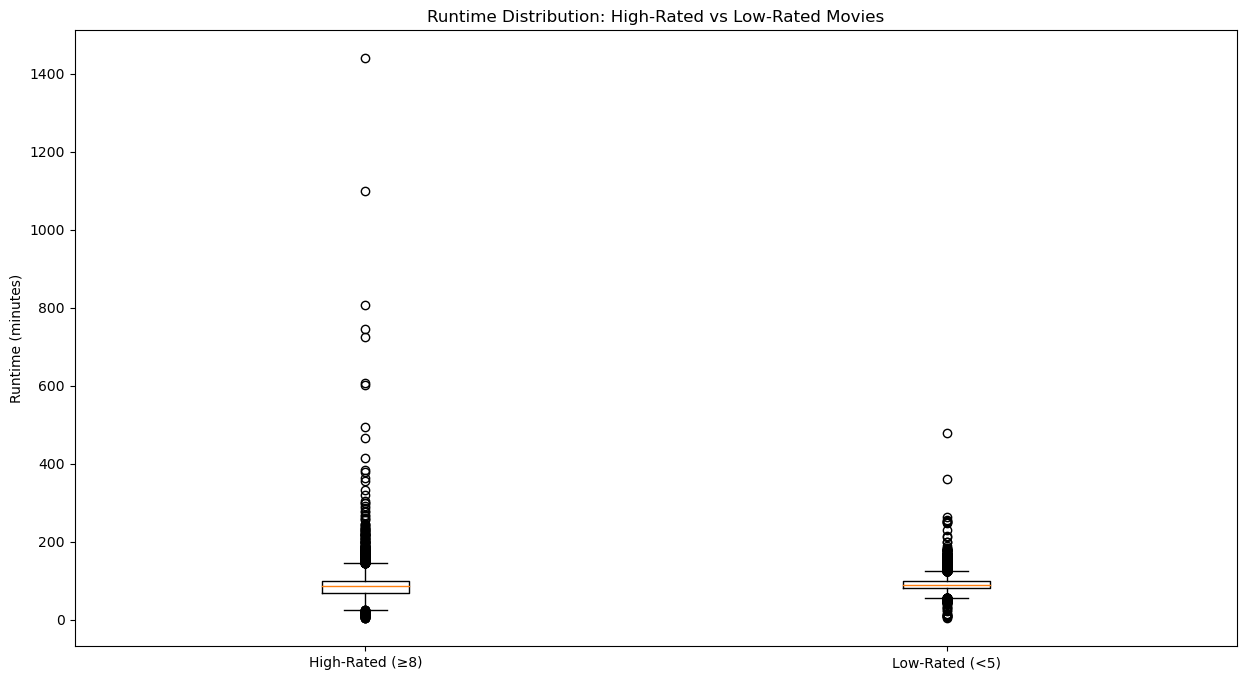

In [677]:
# Creating a box plot
plt.figure(figsize=(15, 8))
data = [high_rated['runtime_minutes'], low_rated['runtime_minutes']]
labels = ['High-Rated (≥8)', 'Low-Rated (<5)']
plt.boxplot(data, labels=labels)
plt.title('Runtime Distribution: High-Rated vs Low-Rated Movies')
plt.ylabel('Runtime (minutes)')
plt.show()

In [678]:
#Runtime distribution by rating bins
movie_stats['rating_bin'] = pd.qcut(movie_stats['averagerating'], q=5, labels=['1-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
runtime_by_rating = movie_stats.groupby('rating_bin')['runtime_minutes'].agg(['mean', 'median', 'std', 'count']).round(2)

print(f"Runtime Analysis by Rating Quintiles:")

print(runtime_by_rating)

# Calculate percentage of movies over 2 hours for each group
high_rated_long = (high_rated['runtime_minutes'] > 120).mean() * 100

low_rated_long = (low_rated['runtime_minutes'] > 120).mean() * 100


Runtime Analysis by Rating Quintiles:
             mean  median     std  count
rating_bin                              
1-20%       96.67    90.0  434.62  13975
20-40%      95.73    93.0   20.32  12668
40-60%      96.69    94.0  124.03  13761
60-80%      94.21    92.0   24.80  12326
80-100%     90.10    88.0   35.66  12990


In [679]:
#print pct of movies over 2 hours
print(f"\
Percentage of movies over 2 hours:")
print(f"High-rated movies: {high_rated_long:.1f}%")

print(f"Low-rated movies: {low_rated_long:.1f}%")

Percentage of movies over 2 hours:
High-rated movies: 9.9%
Low-rated movies: 7.9%


#### Findings

Percentage of movies over 2 hours:

High-rated movies: 9.9%

Low-rated movies: 7.9%

The analysis shows that high-rated movies tend to be slightly shorter on average, but they're actually more likely to be over 2 hours long (9.9% vs 7.9%). This suggests that while shorter runtimes are generally associated with higher ratings, there's a subset of longer, high-quality films that audiences appreciate.

From the value of p-value gotten from our analysis, assuming a significance level of 0.05, then we reject the null hypothesis. This therefore suggests that there is a significant difference in the average runtime of highly rated movies and low rated movies

#### Recomendations
1. We recommend to the company to consider producing shorter films for wider audience appeal while also investing in select, high-quality longer films that can captivate audiences and drive engagement.
2. Allocate more resources to produce a mix of shorter, high-rating-friendly films and select longer, high-quality projects that will meet the expectations of more targeted audiences.
   

In [681]:
# Using Scatter plot to check linearity of domestic_gross and foreign_gross revenues
cleaned_movie_gross = pd.read_csv("movie_gross_csv")
X = cleaned_movie_gross["domestic_gross"]
Y = cleaned_movie_gross["foreign_gross"]


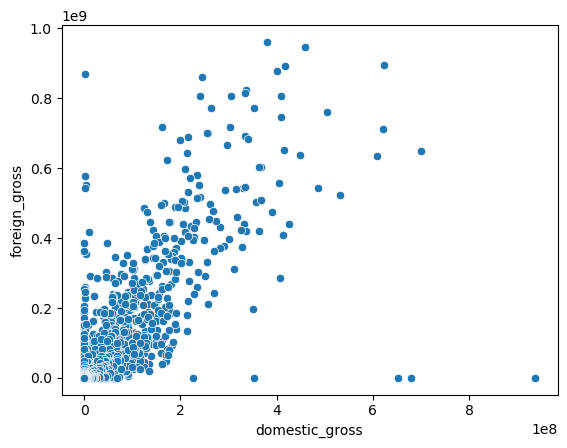

In [ ]:
sns.scatterplot(x=X,y=Y);


In [698]:
# define the model 
import statsmodels.api as sm
from scipy.stats import pearsonr, ttest_ind
from statsmodels.stats.diagnostic import linear_rainbow
def make_model(X,Y):
    model = sm.OLS(endog=Y ,exog=sm.add_constant(X))
    results = model.fit()
    return results

In [699]:
# The model
results = make_model(merged_df["domestic_gross"],merged_df["worldwide_gross"])

linear_rainbow(results)

(1.0046016303476692, 0.4351843050918859)

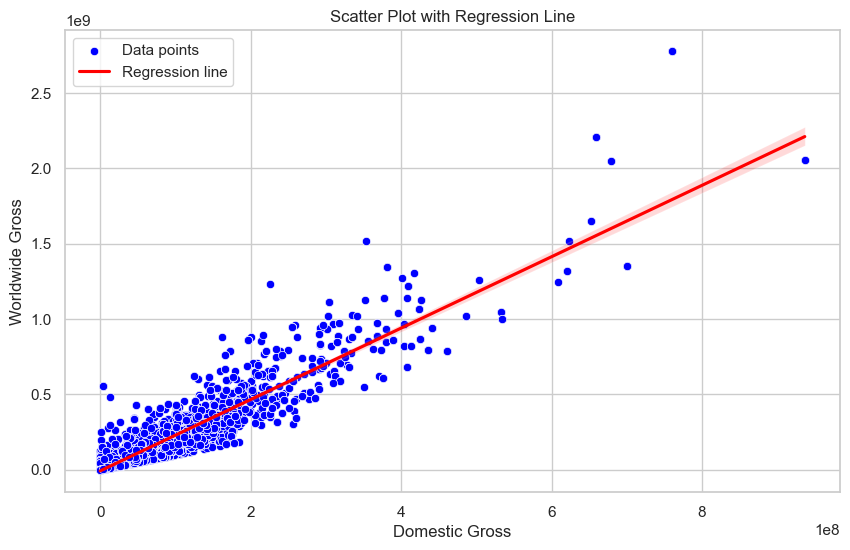

In [ ]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="domestic_gross", y="worldwide_gross", label="Data points", color="blue")

# Overlay a regression line
sns.regplot(data=merged_df, x="domestic_gross", y="worldwide_gross", scatter=False, label="Regression line", color="red")

# Add labels and legend
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Domestic Gross")
plt.ylabel("Worldwide Gross")
plt.legend()

plt.show()

In [ ]:
# define the model 
def make_model(X,Y):
    model = sm.OLS(endog=Y ,exog=sm.add_constant(X))
    results1 = model.fit()
    return results1

In [704]:
# The model
results1 = make_model(merged_df["runtime"],merged_df["production_budget"])

linear_rainbow(results1)

(1.176113672306046, 4.134881259430884e-09)

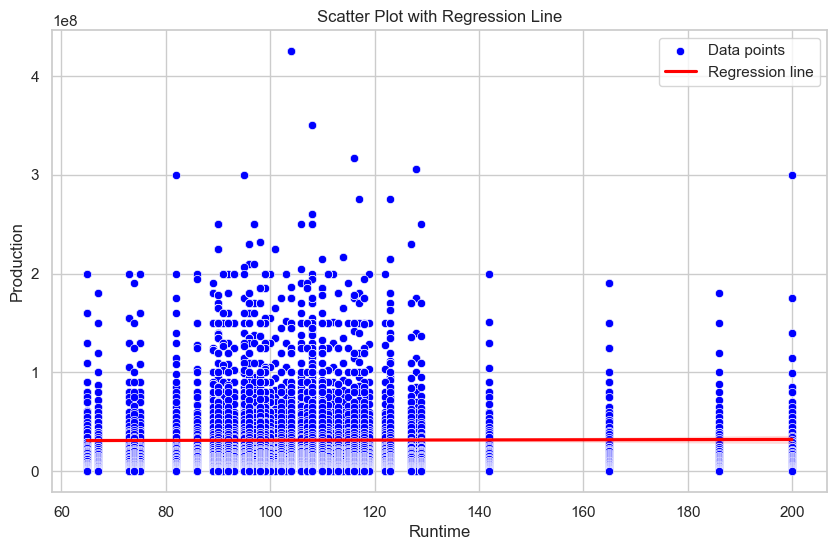

In [711]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="runtime", y="production_budget", label="Data points", color="blue")

# Overlay a regression line
sns.regplot(data=merged_df, x="runtime", y="production_budget", scatter=False, label="Regression line", color="red")

# Add labels and legend
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Runtime")
plt.ylabel("Production")
plt.legend()
plt.show()
